In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [9]:
(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

In [10]:
class_names = ['Uçak', 'Otomobil', 'Kuş', 'Kedi', 'Geyik', 'Köpek', 'Kurbağa', 'At', 'Gemisi', 'Kamyon']

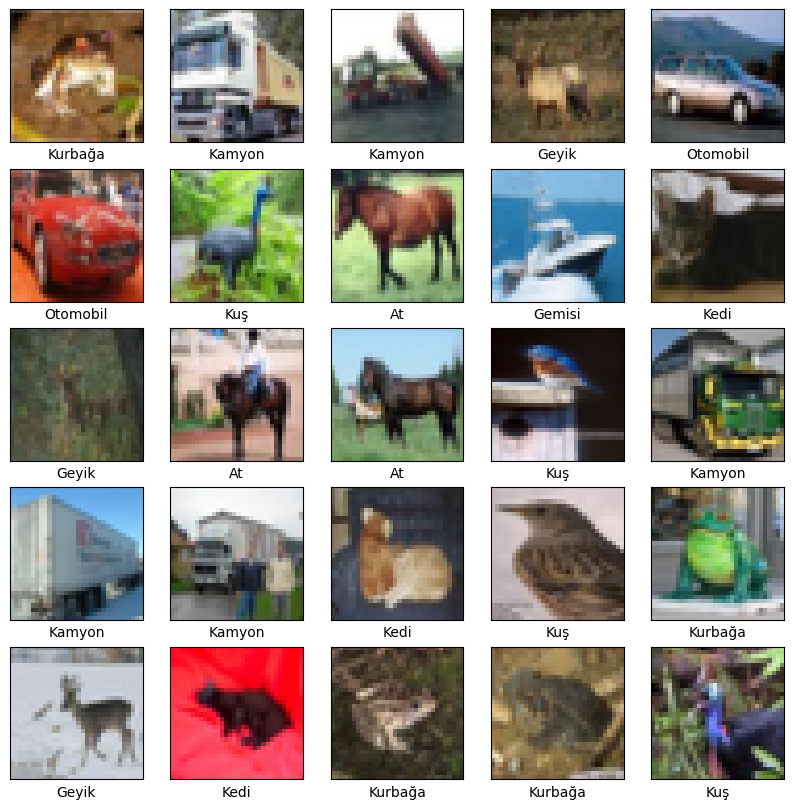

In [11]:
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [13]:
images_train.shape

(50000, 32, 32, 3)

In [14]:
images_test.shape

(10000, 32, 32, 3)

In [16]:
images_train = images_train / 255.0
images_test = images_test / 255.0

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [26]:
history = model.fit(images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3305 - loss: 1.8327 - val_accuracy: 0.5326 - val_loss: 1.3186
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5297 - loss: 1.3133 - val_accuracy: 0.5754 - val_loss: 1.1960
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5828 - loss: 1.1836 - val_accuracy: 0.6067 - val_loss: 1.1236
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6190 - loss: 1.0830 - val_accuracy: 0.6216 - val_loss: 1.0805
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6533 - loss: 0.9863 - val_accuracy: 0.6154 - val_loss: 1.0786
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6757 - loss: 0.9205 - val_accuracy: 0.6369 - val_loss: 1.0428
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7034 - loss: 0.8522 - val_accuracy: 0.6410 - val_loss: 1.0177
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7169 - loss: 

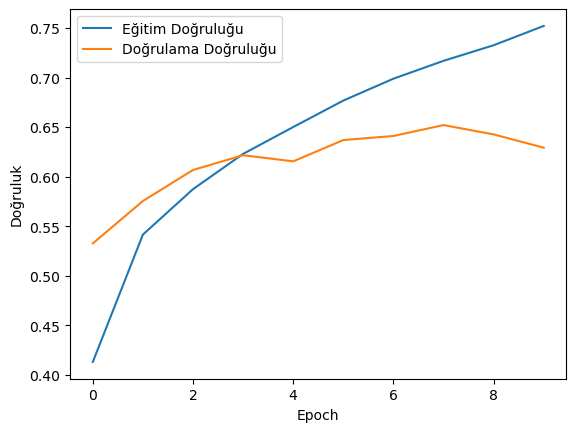

In [27]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.4439 - loss: 1.9802

Test doğruluğu: 0.4438999891281128


In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [38]:
model.compile(optimizer = 'sgd',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [39]:
history = model.fit(images_train, labels_train, epochs = 5, validation_data = (images_test, labels_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1008 - loss: 2.3606 - val_accuracy: 0.1686 - val_loss: 2.2979
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1094 - loss: 2.3146 - val_accuracy: 0.1622 - val_loss: 2.2779
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1343 - loss: 2.2816 - val_accuracy: 0.2162 - val_loss: 2.1871
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1905 - loss: 2.1471 - val_accuracy: 0.2583 - val_loss: 2.0211
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2252 - loss: 2.0392 - val_accuracy: 0.2760 - val_loss: 1.9706


In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.1828 - loss: 2.2382

Test doğruluğu: 0.18279999494552612


In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer = 'sgd',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [43]:
history = model.fit(images_train, labels_train, epochs = 5, validation_data = (images_test, labels_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1844 - loss: 2.1863 - val_accuracy: 0.3066 - val_loss: 1.9175
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3274 - loss: 1.8394 - val_accuracy: 0.4190 - val_loss: 1.5988
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4139 - loss: 1.6127 - val_accuracy: 0.4762 - val_loss: 1.4515
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4689 - loss: 1.4765 - val_accuracy: 0.5049 - val_loss: 1.3729
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5069 - loss: 1.3820 - val_accuracy: 0.5301 - val_loss: 1.3074


In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.3682 - loss: 237.5775

Test doğruluğu: 0.36820000410079956


In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test, labels_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3411 - loss: 1.7838 - val_accuracy: 0.5344 - val_loss: 1.2916
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5696 - loss: 1.2066 - val_accuracy: 0.6015 - val_loss: 1.1302
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6411 - loss: 1.0323 - val_accuracy: 0.6567 - val_loss: 0.9765
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6782 - loss: 0.9192 - val_accuracy: 0.6637 - val_loss: 0.9562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7079 - loss: 0.8306 - val_accuracy: 0.6889 - val_loss: 0.8938
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7297 - loss: 0.7754 - val_accuracy: 0.6965 - val_loss: 0.8794
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7459 - loss: 0.7188 - val_accuracy: 0.7063 - val_loss: 0.8644
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7604 - loss: 0.6805 - 

In [48]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.4689 - loss: 247.1997

Test doğruluğu: 0.46889999508857727


In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test, labels_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3284 - loss: 1.8116 - val_accuracy: 0.5420 - val_loss: 1.2756
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5495 - loss: 1.2675 - val_accuracy: 0.6258 - val_loss: 1.0608
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6190 - loss: 1.0798 - val_accuracy: 0.6534 - val_loss: 0.9899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6556 - loss: 0.9756 - val_accuracy: 0.6688 - val_loss: 0.9532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6910 - loss: 0.8847 - val_accuracy: 0.6798 - val_loss: 0.9174
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7134 - loss: 0.8147 - val_accuracy: 0.6909 - val_loss: 0.8963
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7272 - loss: 0.7716 - val_accuracy: 0.7040 - val_loss: 0.8672
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7415 - loss: 0.7365 - 

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.5106 - loss: 201.6687

Test doğruluğu: 0.5105999708175659


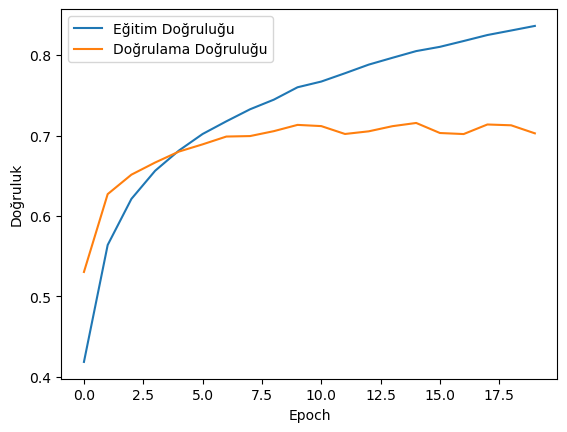

In [75]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [64]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [65]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test, labels_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3408 - loss: 1.7736 - val_accuracy: 0.5354 - val_loss: 1.2767
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5695 - loss: 1.2108 - val_accuracy: 0.6180 - val_loss: 1.0753
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6358 - loss: 1.0353 - val_accuracy: 0.6426 - val_loss: 1.0410
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6775 - loss: 0.9153 - val_accuracy: 0.6703 - val_loss: 0.9526
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7072 - loss: 0.8425 - val_accuracy: 0.6784 - val_loss: 0.9401
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7307 - loss: 0.7707 - val_accuracy: 0.7019 - val_loss: 0.8742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7479 - loss: 0.7223 - val_accuracy: 0.6956 - val_loss: 0.8853
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7654 - loss: 0.6752 -

In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.4402 - loss: 252.6348

Test doğruluğu: 0.44020000100135803


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test, labels_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2963 - loss: 1.8608 - val_accuracy: 0.5023 - val_loss: 1.3493
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5202 - loss: 1.3348 - val_accuracy: 0.5863 - val_loss: 1.1491
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5893 - loss: 1.1558 - val_accuracy: 0.6252 - val_loss: 1.0396
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6320 - loss: 1.0438 - val_accuracy: 0.6355 - val_loss: 1.0406
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6626 - loss: 0.9637 - val_accuracy: 0.6672 - val_loss: 0.9565
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6904 - loss: 0.8966 - val_accuracy: 0.6843 - val_loss: 0.9160
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7138 - loss: 0.8258 - val_accuracy: 0.6642 - val_loss: 0.9642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7244 - loss: 0.8006 -

In [70]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.4125 - loss: 257.6327

Test doğruluğu: 0.4124999940395355


In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [72]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [73]:
history = model.fit(images_train, labels_train, epochs=20, validation_data=(images_test, labels_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3257 - loss: 1.8064 - val_accuracy: 0.5303 - val_loss: 1.3201
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5490 - loss: 1.2646 - val_accuracy: 0.6271 - val_loss: 1.0656
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6165 - loss: 1.0903 - val_accuracy: 0.6513 - val_loss: 0.9969
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6540 - loss: 0.9869 - val_accuracy: 0.6664 - val_loss: 0.9478
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6841 - loss: 0.8975 - val_accuracy: 0.6800 - val_loss: 0.9272
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6997 - loss: 0.8566 - val_accuracy: 0.6890 - val_loss: 0.8970
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7184 - loss: 0.7937 - val_accuracy: 0.6987 - val_loss: 0.8705
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7332 - loss: 0.7457 -

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.4710 - loss: 353.3547

Test doğruluğu: 0.47099998593330383
